# Первая производная функции

Для нахождения первой производной используются разностные методы<br/>
Можно находить первую производную с разным порядком точности $O(h^n)$, где $n$ - порядок точности, $h$ - ширина шага (равномерной сетки)

Нахождение первой производной может быть осуществлено левыми, центральными и правыми разностями. По определению производной:

 $$f'(x)=\lim_\limits{h\to0}{\frac{f(x+h)-f(x)}{h}}$$

Для численного нахождения производной можно использовать формулу:

$$f'(x)=\frac{f(x+h)-f(x)}{h}$$ Как можно видеть, мы используем правое значение функции $f(x+h)$, поэтому эта формула определяется как "правая разность" 

Аналогично

$$f'(x)=\frac{f(x)-f(x-h)}{h}$$ получается и формула через левые разности

Однако и левая, и правая разности приближают значение производной с точностью до $O(h)$<br/>
Рассмотрим же теперь центральную разность. Возьмём значения функции в левой и правой точках от данной и разложим в ряд Тейлора:

$$f(x+h)=f(x)+\frac{h}{1!}f'(x)+\frac{h^2}{2!}f''(x)+O(h^3),$$

$$f(x-h)=f(x)-\frac{h}{1!}f'(x)+\frac{h^2}{2!}f''(x)+O(h^3),$$

и затем вычтем $f(x-h)$ из $f(x+h)$:

$$f(x+h)-f(x-h)=\left( f(x)+\frac{h}{1!}f'(x)+\frac{h^2}{2!}f''(x)+O(h^3)\right)-\left( f(x)-\frac{h}{1!}f'(x)+\frac{h^2}{2!}f''(x)+O(h^3)\right)=2hf'(x)+O(h^3)$$

$$f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\frac{O(h^3)}{2h}=\frac{f(x+h)-f(x-h)}{2h}+O(h^2)$$

Как видно из полученной формулы, порядок точности метода центральных разностей равен 2

#### Далее приведена реализация методов разностей для первой производной

Введите число делений сетки:  10
Введите тип разности (RIGHT, CENTER, LEFT):  CENTER


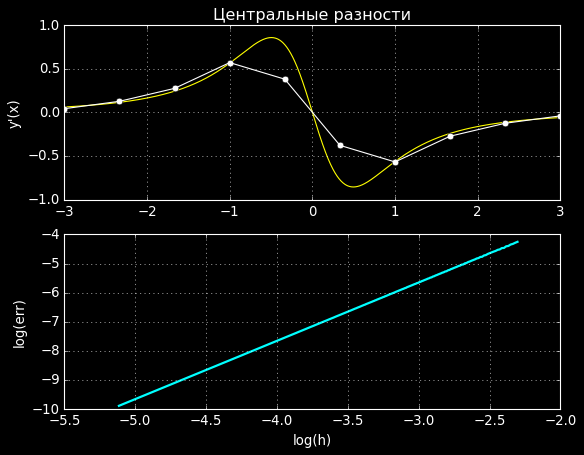

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *

#-------------------------------------------------------

plt.style.use('classic')
plt.style.use('dark_background')

#--------------------Наша функция-----------------------

def init__func(x):
    return (math.sinh(1 / (1 + x*x)))

#-------------------------------------------------------
    
a = -3
b =  3 

n = int(input("Введите число делений сетки:  "))
h = (b - a) / n

#---------------Задаем тип разностей------------------

dtype = input("Введите тип разности (RIGHT, CENTER, LEFT):  ")
title = ""
if (dtype == "CENTER"):
    title = "Центральные разности"
elif (dtype == "RIGHT"):
    title = "Правые разности"
elif (dtype == "LEFT"):
    title = "Левые разности"

#-----------------Differetnial function-----------------
def func__dif(dif__type, n, func = init__func):
    F = []
    h = (b - a) / (n - 1)
    if dif__type == "RIGHT":
        X = np.linspace(a, b + h, n + 1)
        Y = [func(i) for i in X]
        
        for i in range(n):
            f = (Y[i + 1] - Y[i]) / h
            F.append(f)
            
    elif dif__type == "CENTER":
        X = np.linspace(a, b, n)
        Y = [func(i) for i in X]
        
        f = (-3*Y[0] + 4*Y[1] - Y[2]) / (2 * h)
        F.append(f)
        for i in range(1, n - 1):
            f = (Y[i + 1] - Y[i - 1]) / (2 * h)
            F.append(f)
        f = (3*Y[n-1] - 4*Y[n-2] + Y[n-3]) / (2 * h)
        F.append(f)
        
    elif dif__type == "LEFT":
        X = np.linspace(a, b + h, n + 1)
        Y = [func(i) for i in X]
        
        for i in range(n):
            f = (Y[i] - Y[i - 1]) / h
            F.append(f)
    else:
        print("SYNTAX ERROR: Неизвестный метод/тип разностей")
    
    return F

x = Symbol('x')
func = (sinh(1 / (1 + x*x)))

func = func.diff()
f = lambdify(x, func, 'numpy') 


#-------------------------------------------------------

def difference(correct, got):
    res = [abs(correct[i] - got[i]) for i in range(len(got))]
    return max(res)

def log__graph():
    res = []
    hs = []
    for j in range(60, 1000):
        h = (b - a) / j
        X = np.linspace(a, b, num=j)
        Y1 = func__dif(dtype, j)
        Y2 = [f(i) for i in X]
        hs.append(log(h))
        res.append(log(difference(Y2, Y1)))
    return hs, res

#-------------------------------------------------------
    
init__func__x = np.linspace(a, b, num=1000)
init__func__y = [init__func(i) for i in init__func__x]
diff__func__y = [f(i) for i in init__func__x]

#-------------------------------------------------------


X = np.linspace(a, b, n)
    
fig1 = plt.subplot(211)
plt.title(title)
plt.ylabel("y'(x)")

fig1.plot(init__func__x, diff__func__y, linewidth = 1, color="yellow")
fig1.plot(X, func__dif(dtype, n), "o", X, func__dif(dtype, n), linewidth = 1, color="white")

plt.grid(True)

#-------------------------------------------------------
#print(log__graph())
hs, vals = log__graph()

#print(hs)
#print(vals)
plt.subplot(212)
plt.xlabel("log(h)")
plt.ylabel("log(err)")
line2 = plt.plot(hs, vals, color="aqua", linewidth=2)
plt.grid(True)
plt.show()

На перовм рисунке строится реальный график производной и схематичный полученный нами график<br/>
На втором рисунке строится график зависимости <b>логарифма ошибки $log(err)$</b> от <b>логарифма шага $log(h)$</b>.
Из графика ошибки видно, что погрешность данного метода равна $O(h^2)$

# Вторая производная функции

Нахождение второй производной функции несколько сложнее, чем нахождение первой производной. Здесь будут приведины только формулы и их вывод.

Для начала запишем выражение для второй производной через первую, а первую производную в свою очередь распишем через центральную разность для функции $f'(x)$:

$$f''(x)=\left( f'(x) \right)'=\lim\limits_{h\to0}\frac{f'(x+h)-f'(x)}{h}$$

Численно можно записать так

$$f''(x)=\frac{f'(x+h)-f'(x)}{h}=\frac{\frac{f(x+h)-f(x)}{h}-\frac{f(x)-f(x-h)}{h}}{h}=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$

Порядок точности данного метода равен 2.

Напишем реализацию этого метода

In [3]:
def second_derivative_2nd(n, func=init__func):
    h = (b - a) / (n - 1)
    X = np.linspace(a, b, n)
    Y = [func(i) for i in X]

    res = []
    res.append((2*Y[0] - 5*Y[1] + 4*Y[2] - Y[3]) / (h * h))
    for i in range(1, n - 1):
        res.append((Y[i - 1] + Y[i + 1] - 2 * Y[i]) / (h * h))
    res.append((2*Y[n-1] - 5*Y[n-2] + 4*Y[n-3] - Y[n-4]) / (h * h))
    return res

Введите количество делений сетки: 10


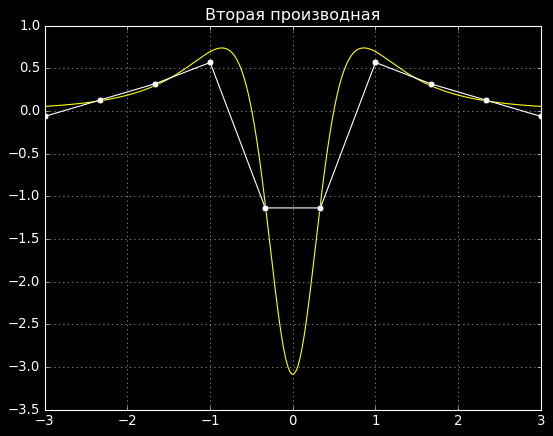

In [4]:
x = Symbol('x')
func = (sinh(1 / (1 + x*x)))

func = func.diff()
func = func.diff()
f = lambdify(x, func, 'numpy')

n = int(input("Введите количество делений сетки: "))

X = np.linspace(a, b, n)
Y = second_derivative_2nd(n)

true_X = np.linspace(a, b, 1000)
true_Y = [f(i) for i in true_X]

plt.title("Вторая производная")
plt.plot(true_X, true_Y, linewidth=1, color="yellow")
plt.plot(X, Y, "o", X, Y, linewidth=1, color="white")
plt.grid(True)

Нарисуем также график зависимости <b>логарифма ошибки $log(err)$</b> от <b>логарифма шага $log(h)$</b>

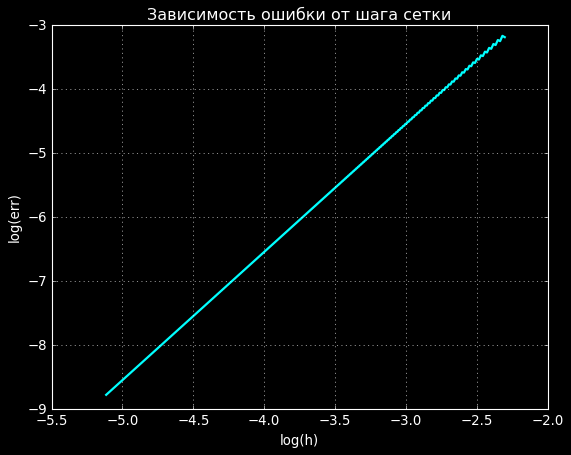

In [5]:
def log__graph(fun):
    res = []
    hs = []
    for j in range(60, 1000):
        h = (b - a) / j
        X = np.linspace(a, b, num=j)
        Y1 = fun(j)
        Y2 = [f(i) for i in X]
        hs.append(log(h))
        res.append(log(difference(Y2, Y1)))
    return hs, res

hs, vals = log__graph(second_derivative_2nd)

plt.title("Зависимость ошибки от шага сетки")
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.plot(hs, vals, color="aqua", linewidth=2)
plt.grid(True)
plt.show()

График доказывает, что степень точности данного метода равна 2.

Найдём теперь вторую производную функции 4 порядка точности, используя 5 различных точек: $x, x\pm h, x\pm2h$

Разложим значения функций в этих точках в ряд Тейлора:

$$ f(x+h)=f(x)+\frac{h}{1!}f'(x)+\frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(x)+\frac{h^5}{5!}f^{(5)}(x)+O(h^6) $$

$$ f(x-h)=f(x)-\frac{h}{1!}f'(x)+\frac{h^2}{2!}f''(x)-\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(x)-\frac{h^5}{5!}f^{(5)}(x)+O(h^6) $$

$$ f(x+2h)=f(x)+\frac{2h}{1!}f'(x)+\frac{4h^2}{2!}f''(x)+\frac{8h^3}{3!}f'''(x)+\frac{16h^4}{4!}f^{(4)}(x)+\frac{32h^5}{5!}f^{(5)}(x)+O(h^6) $$

$$ f(x-2h)=f(x)-\frac{2h}{1!}f'(x)+\frac{4h^2}{2!}f''(x)-\frac{8h^3}{3!}f'''(x)+\frac{16h^4}{4!}f^{(4)}(x)-\frac{32h^5}{5!}f^{(5)}(x)+O(h^6) $$

---

Найдём $f(x+h)+f(x-h)$, $f(x+2h)-f(x-2h)$

$$ f(x+h)+f(x-h)=f(x)+\frac{h}{1!}f'(x)+\frac{h^2}{2!}f''(x)+\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(x)+\frac{h^5}{5!}f^{(5)}(x)+O(h^6)+f(x)-\frac{h}{1!}f'(x)+\frac{h^2}{2!}f''(x)-\frac{h^3}{3!}f'''(x)+\frac{h^4}{4!}f^{(4)}(x)-\frac{h^5}{5!}f^{(5)}(x)+O(h^6) $$

$$ f(x+h)+f(x-h)=2f(x)+\frac{2h^2}{2!}f''(x)+\frac{2h^4}{4!}f^{(4)}+O(h^6) $$

---

$$ f(x+2h)+f(x-2h)=f(x)+\frac{2h}{1!}f'(x)+\frac{4h^2}{2!}f''(x)+\frac{8h^3}{3!}f'''(x)+\frac{16h^4}{4!}f^{(4)}(x)+\frac{32h^5}{5!}f^{(5)}(x)+O(h^6)+f(x)-\frac{2h}{1!}f'(x)+\frac{4h^2}{2!}f''(x)-\frac{8h^3}{3!}f'''(x)+\frac{16h^4}{4!}f^{(4)}(x)-\frac{32h^5}{5!}f^{(5)}(x)+O(h^6) $$

Итого

$$ f(x+2h)+f(x-2h)=2f(x)+\frac{8h^2}{2!}f''(x)+\frac{32h^4}{4!}f^{(4)}+O(h^6) $$

---

Заметим, что последнее выражение имеет множитель $\frac{32}{4!}h^4$ перед четвёртой производной, а первое выражение $-$ только $\frac{2}{4!}h^4$. Поэтому домножим первое выражение на 16 и вычтем из него второе выражение:

$$ 16(f(x+h)+f(x-h))-(f(x+2h)+f(x-2h))=32f(x)+\frac{32h^2}{2!}f''(x)+\frac{32h^4}{4!}f^{(4)}+O(h^6)-2f(x)-\frac{8h^2}{2!}f''(x)-\frac{32h^4}{4!}+O(h^6) $$

$$ 16f(x+h)+16(x-h)-f(x+2h)-f(x-2h)=30f(x)+\frac{24h^2}{2!}f''(x)+O(h^6) $$

---

$$ f''(x)=\frac{-f(x-2h)+16f(x-h)-30f(x)+16f(x+h)-f(x+2h)}{12h^2} + O(h^4) $$

Реализуем данный метод

In [6]:
def second_derivative_4th(n, func=init__func):
    h = (b - a) / (n - 1)
    X = np.linspace(a - 2*h, b + 2*h, n + 4)
    Y = [func(i) for i in X]
    
    res = []
    for i in range(2, n+2):
        res.append((-Y[i-2] + 16 * Y[i-1] - 30 * Y[i] + 16 * Y[i+1] - Y[i+2]) / (12 * h * h))
    return res

Введите количество делений сетки: 21


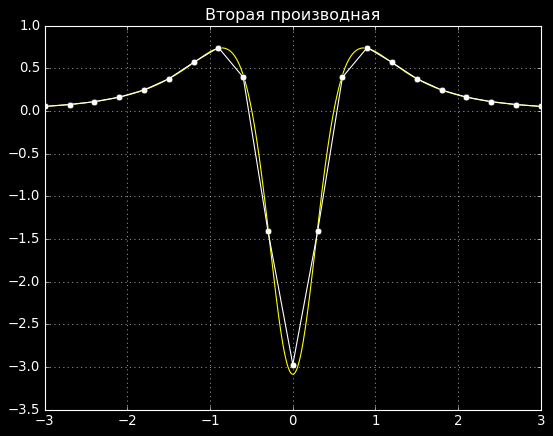

In [7]:
n = int(input("Введите количество делений сетки: "))

X = np.linspace(a, b, n)
Y = second_derivative_4th(n)

plt.title("Вторая производная")
plt.plot(true_X, true_Y, linewidth=1, color="yellow")
plt.plot(X, Y, "o", X, Y, linewidth=1, color="white")
plt.grid(True)

Посчитаем ошибку для данного метода

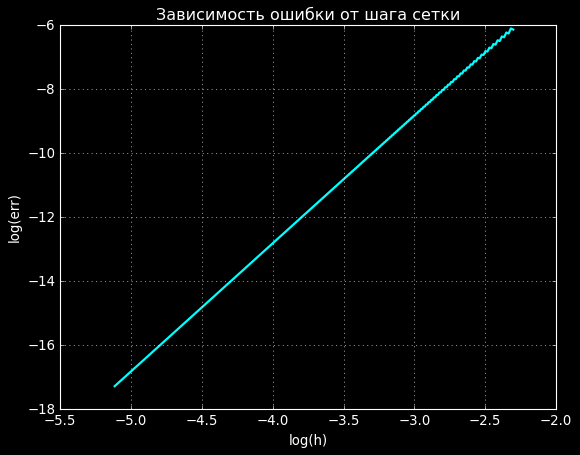

In [8]:
hs, vals = log__graph(second_derivative_4th)

plt.title("Зависимость ошибки от шага сетки")
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.plot(hs, vals, color="aqua", linewidth=2)
plt.grid(True)
plt.show()

Как хорошо видно из графика, погрешность полученного решение равна $O(h^4)$.